PORTFOLIO OPTIMIZATION -  CORRELATIONS AND VOLATILITY/PROFITABILITY

In [73]:
pip install yfinance



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [74]:
import yfinance as yf
import numpy as np 

In [75]:
tickers=["MMM","AMZN","FDX","GE","HD","PPL","JNJ","AAPL","WMT","MS"]
print("la primera empresa es: ", tickers[0])
print("la cantidad de tickers: ",len(tickers))
N=len(tickers)

start_date="2009-12-31"
end_date="2022-12-31"

df=yf.download("AAPL",start=start_date,end=end_date,interval="1mo")

la primera empresa es:  MMM
la cantidad de tickers:  10
[*********************100%***********************]  1 of 1 completed


In [76]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,7.622500,7.699643,6.794643,6.859286,5.822137,15168994400
2010-02-01,6.870357,7.327500,6.816071,7.307857,6.202884,10776080000
2010-03-01,7.348214,8.481429,7.337500,8.392857,7.123827,12154172800
2010-04-01,8.478929,9.730714,8.312500,9.324643,7.914724,12367129600
2010-05-01,9.422857,9.567143,7.116071,9.174286,7.787103,18082654800
...,...,...,...,...,...,...
2022-08-01,161.009995,176.149994,157.139999,157.220001,156.076004,1510239600
2022-09-01,156.639999,164.259995,138.000000,138.199997,137.384964,2084722800
2022-10-01,138.210007,157.500000,134.369995,153.339996,152.435684,1868139700


In [77]:
df.iloc[0,:]

Open         7.622500e+00
High         7.699643e+00
Low          6.794643e+00
Close        6.859286e+00
Adj Close    5.822137e+00
Volume       1.516899e+10
Name: 2010-01-01 00:00:00, dtype: float64

In [78]:
df["Open"]

Date
2010-01-01      7.622500
2010-02-01      6.870357
2010-03-01      7.348214
2010-04-01      8.478929
2010-05-01      9.422857
                 ...    
2022-08-01    161.009995
2022-09-01    156.639999
2022-10-01    138.210007
2022-11-01    155.080002
2022-12-01    148.210007
Name: Open, Length: 156, dtype: float64

In [79]:
df.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=156, freq=None)

In [80]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-01,7.622500,7.699643,6.794643,6.859286,5.822137,15168994400
2010-02-01,6.870357,7.327500,6.816071,7.307857,6.202884,10776080000
2010-03-01,7.348214,8.481429,7.337500,8.392857,7.123827,12154172800
2010-04-01,8.478929,9.730714,8.312500,9.324643,7.914724,12367129600
2010-05-01,9.422857,9.567143,7.116071,9.174286,7.787103,18082654800
...,...,...,...,...,...,...
2022-08-01,161.009995,176.149994,157.139999,157.220001,156.076004,1510239600
2022-09-01,156.639999,164.259995,138.000000,138.199997,137.384964,2084722800
2022-10-01,138.210007,157.500000,134.369995,153.339996,152.435684,1868139700


In [81]:
M=len(df)
M

156

In [82]:
P=np.zeros((M,N))
n=0

for t in tickers:
    print("bajando ticker", t)
    df=yf.download(t,start=start_date,end=end_date,interval="1mo")
    df=df.dropna()
    P[:,n]=df["Adj Close"]
    n=n+1



bajando ticker MMM
[*********************100%***********************]  1 of 1 completed
bajando ticker AMZN
[*********************100%***********************]  1 of 1 completed
bajando ticker FDX
[*********************100%***********************]  1 of 1 completed
bajando ticker GE
[*********************100%***********************]  1 of 1 completed
bajando ticker HD
[*********************100%***********************]  1 of 1 completed
bajando ticker PPL
[*********************100%***********************]  1 of 1 completed
bajando ticker JNJ
[*********************100%***********************]  1 of 1 completed
bajando ticker AAPL
[*********************100%***********************]  1 of 1 completed
bajando ticker WMT
[*********************100%***********************]  1 of 1 completed
bajando ticker MS
[*********************100%***********************]  1 of 1 completed


In [83]:
import pandas as pd
fecha=df.index
P=pd.DataFrame(P,index=fecha,columns=tickers)
P

,MMM,AMZN,FDX,GE,HD,PPL,JNJ,AAPL,WMT,MS
Date,,,,,,,,,,
2010-01-01,53.356121,6.270500,68.407379,70.860558,20.341877,14.319926,42.405365,5.822138,39.283131,20.428078
2010-02-01,53.130760,5.920000,74.003960,70.772408,22.658566,13.829483,42.499790,6.202882,39.753681,21.535414
2010-03-01,55.761620,6.788500,81.547569,80.703514,23.493750,13.455576,44.320457,7.123827,40.878586,22.383684
2010-04-01,59.164551,6.855000,78.687614,83.630089,25.775637,12.170092,43.708664,7.914724,39.659836,23.094393
2010-05-01,52.919155,6.273000,72.987755,72.500145,24.773291,12.686184,39.630112,7.787105,37.382576,20.752371
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,116.531845,126.769997,205.945358,57.108685,280.758240,28.128016,156.914383,156.076019,129.985229,82.246559
2022-09-01,104.615334,113.000000,145.043915,48.142681,270.362335,24.520124,159.946472,137.384964,127.744339,76.253250
2022-10-01,119.091072,102.440002,157.440262,60.581978,290.144226,25.819132,170.334778,152.435684,140.183929,79.302986


In [84]:
P_aux=P.to_numpy()
diffP=np.diff(P_aux,n=1,axis=0)
diffP

array([[ -0.22536087,  -0.35050011,   5.59658051, ...,   0.38074446,
          0.47055054,   1.10733604],
       [  2.63085938,   0.86849976,   7.54360962, ...,   0.92094421,
          1.12490463,   0.84827042],
       [  3.40293121,   0.06650019,  -2.85995483, ...,   0.79089785,
         -1.21875   ,   0.71070862],
       ...,
       [ 14.47573853, -10.55999756,  12.39634705, ...,  15.05072021,
         12.43959045,   3.04973602],
       [  0.17040253,  -5.90000153,  21.55126953, ...,  -5.27867126,
          9.93782043,  11.39076233],
       [ -4.39840698, -12.54000092,  -8.86019897, ..., -17.77900696,
        -10.4697113 ,  -7.84446716]])

In [85]:
r=np.divide(diffP,P_aux[0:M-1,:])
r

array([[-0.00422371, -0.05589667,  0.08181253, ...,  0.06539599,
         0.01197844,  0.05420657],
       [ 0.04951669,  0.14670604,  0.10193522, ...,  0.14847037,
         0.02829687,  0.03938956],
       [ 0.06102641,  0.00979601, -0.035071  , ...,  0.11102149,
        -0.0298139 ,  0.03175119],
       ...,
       [ 0.1383711 , -0.09345131,  0.08546616, ...,  0.10955144,
         0.0973788 ,  0.03999483],
       [ 0.00143086, -0.0575947 ,  0.13688538, ..., -0.03462884,
         0.0708913 ,  0.14363598],
       [-0.03688037, -0.12989435, -0.04950066, ..., -0.12081658,
        -0.06974147, -0.08649402]])

In [86]:
(P_aux[1,0]-P_aux[0,1])/P_aux[1,1]

7.915584359097038

In [87]:
r=pd.DataFrame(r,index=fecha[1:M],columns=tickers)
r

,MMM,AMZN,FDX,GE,HD,PPL,JNJ,AAPL,WMT,MS
Date,,,,,,,,,,
2010-02-01,-0.004224,-0.055897,0.081813,-0.001244,0.113888,-0.034249,0.002227,0.065396,0.011978,0.054207
2010-03-01,0.049517,0.146706,0.101935,0.140325,0.036860,-0.027037,0.042839,0.148470,0.028297,0.039390
2010-04-01,0.061026,0.009796,-0.035071,0.036263,0.097127,-0.095535,-0.013804,0.111021,-0.029814,0.031751
2010-05-01,-0.105560,-0.084902,-0.072437,-0.133085,-0.038887,0.042407,-0.093312,-0.016124,-0.057420,-0.101411
2010-06-01,0.002228,-0.129125,-0.160258,-0.118043,-0.170998,-0.033320,0.022289,-0.020827,-0.043725,-0.143858
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,-0.131877,-0.060615,-0.095585,-0.006359,-0.041603,0.000000,-0.075521,-0.032552,0.003786,0.020499
2022-09-01,-0.102260,-0.108622,-0.295717,-0.156999,-0.037028,-0.128267,0.019323,-0.119756,-0.017240,-0.072870
2022-10-01,0.138371,-0.093451,0.085466,0.258384,0.073168,0.052977,0.064949,0.109551,0.097379,0.039995


In [88]:
import math
t_inic=int(math.ceil(2*M/3))
t_inic
r_train=r.iloc[0:t_inic-1,]
r_train

,MMM,AMZN,FDX,GE,HD,PPL,JNJ,AAPL,WMT,MS
Date,,,,,,,,,,
2010-02-01,-0.004224,-0.055897,0.081813,-0.001244,0.113888,-0.034249,0.002227,0.065396,0.011978,0.054207
2010-03-01,0.049517,0.146706,0.101935,0.140325,0.036860,-0.027037,0.042839,0.148470,0.028297,0.039390
2010-04-01,0.061026,0.009796,-0.035071,0.036263,0.097127,-0.095535,-0.013804,0.111021,-0.029814,0.031751
2010-05-01,-0.105560,-0.084902,-0.072437,-0.133085,-0.038887,0.042407,-0.093312,-0.016124,-0.057420,-0.101411
2010-06-01,0.002228,-0.129125,-0.160258,-0.118043,-0.170998,-0.033320,0.022289,-0.020827,-0.043725,-0.143858
...,...,...,...,...,...,...,...,...,...,...
2018-04-01,-0.114477,0.082075,0.031673,0.043769,0.042717,0.044131,-0.012954,-0.015019,0.000196,-0.043365
2018-05-01,0.014610,0.040539,0.007767,0.000711,0.009470,-0.061168,-0.054312,0.130763,-0.066923,-0.023997
2018-06-01,0.004236,0.043065,-0.088552,-0.033381,0.051688,0.045022,0.021902,-0.005599,0.044216,-0.054647


In [89]:
u=12*r_train.mean()
u

MMM     0.151682
AMZN    0.364485
FDX     0.164513
GE      0.030870
HD      0.272233
PPL     0.069254
JNJ     0.128705
AAPL    0.292008
WMT     0.108376
MS      0.133535
dtype: float64

In [90]:
sigma=math.sqrt(12)*r_train.std()
sigma

MMM     0.167246
AMZN    0.278129
FDX     0.225540
GE      0.218760
HD      0.186358
PPL     0.155510
JNJ     0.135594
AAPL    0.244509
WMT     0.172100
MS      0.314901
dtype: float64

In [91]:
pip install matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [92]:
import matplotlib.pyplot as plt

In [93]:
rho=r_train.corr()
rho

,MMM,AMZN,FDX,GE,HD,PPL,JNJ,AAPL,WMT,MS
MMM,1.000000,0.319403,0.550739,0.516877,0.506036,0.167405,0.537934,0.315436,0.332185,0.530167
AMZN,0.319403,1.000000,0.321372,0.252234,0.290764,0.136565,0.272429,0.329236,0.157223,0.229856
FDX,0.550739,0.321372,1.000000,0.519834,0.407642,0.121368,0.270478,0.239765,0.252384,0.620874
GE,0.516877,0.252234,0.519834,1.000000,0.529918,0.152189,0.362398,0.283821,0.124033,0.500253
HD,0.506036,0.290764,0.407642,0.529918,1.000000,0.131860,0.248267,0.255298,0.231687,0.472817
PPL,0.167405,0.136565,0.121368,0.152189,0.131860,1.000000,0.373296,0.031466,0.333613,-0.036294
JNJ,0.537934,0.272429,0.270478,0.362398,0.248267,0.373296,1.000000,0.124277,0.423365,0.182425
AAPL,0.315436,0.329236,0.239765,0.283821,0.255298,0.031466,0.124277,1.000000,0.128083,0.177356
WMT,0.332185,0.157223,0.252384,0.124033,0.231687,0.333613,0.423365,0.128083,1.000000,0.089991
MS,0.530167,0.229856,0.620874,0.500253,0.472817,-0.036294,0.182425,0.177356,0.089991,1.000000


In [94]:
pip install matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [95]:
import matplotlib.pyplot as plt


In [96]:
rho.style.background_gradient(cmap="coolwarm")

,MMM,AMZN,FDX,GE,HD,PPL,JNJ,AAPL,WMT,MS
MMM,1.000000,0.319403,0.550739,0.516877,0.506036,0.167405,0.537934,0.315436,0.332185,0.530167
AMZN,0.319403,1.000000,0.321372,0.252234,0.290764,0.136565,0.272429,0.329236,0.157223,0.229856
FDX,0.550739,0.321372,1.000000,0.519834,0.407642,0.121368,0.270478,0.239765,0.252384,0.620874
GE,0.516877,0.252234,0.519834,1.000000,0.529918,0.152189,0.362398,0.283821,0.124033,0.500253
HD,0.506036,0.290764,0.407642,0.529918,1.000000,0.131860,0.248267,0.255298,0.231687,0.472817
PPL,0.167405,0.136565,0.121368,0.152189,0.131860,1.000000,0.373296,0.031466,0.333613,-0.036294
JNJ,0.537934,0.272429,0.270478,0.362398,0.248267,0.373296,1.000000,0.124277,0.423365,0.182425
AAPL,0.315436,0.329236,0.239765,0.283821,0.255298,0.031466,0.124277,1.000000,0.128083,0.177356
WMT,0.332185,0.157223,0.252384,0.124033,0.231687,0.333613,0.423365,0.128083,1.000000,0.089991
MS,0.530167,0.229856,0.620874,0.500253,0.472817,-0.036294,0.182425,0.177356,0.089991,1.000000


Text(0.5, 0, 'Volatilidad')

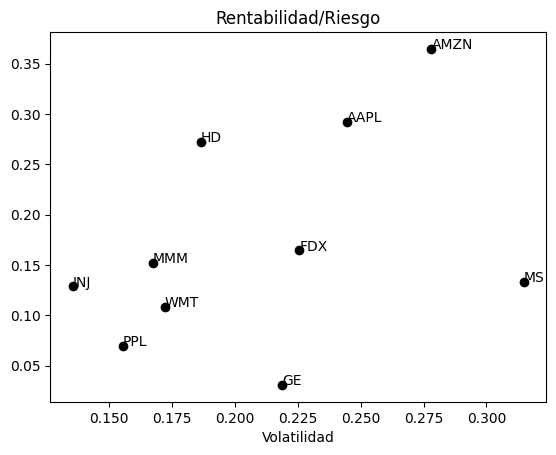

In [97]:
plt.scatter(sigma,u,color=(0,0,0),label=tickers)

for i in range(0,N):
    plt.annotate(tickers[i],(sigma[i],u[i]))

plt.title("Rentabilidad/Riesgo")
plt.xlabel("Volatilidad")

In [98]:
sigma_aux=sigma.to_numpy()
rho_aux=rho.to_numpy()
d_sigma=np.diag(sigma_aux)
C=np.dot(d_sigma,np.dot(rho_aux,d_sigma))
C=pd.DataFrame(C,index=tickers,columns=tickers)
C

,MMM,AMZN,FDX,GE,HD,PPL,JNJ,AAPL,WMT,MS
MMM,0.027971,0.014857,0.020774,0.018911,0.015772,0.004354,0.012199,0.012899,0.009561,0.027922
AMZN,0.014857,0.077356,0.020159,0.015347,0.015071,0.005907,0.010274,0.022390,0.007526,0.020132
FDX,0.020774,0.020159,0.050868,0.025648,0.017134,0.004257,0.008272,0.013222,0.009796,0.044096
GE,0.018911,0.015347,0.025648,0.047856,0.021604,0.005177,0.010750,0.015181,0.004670,0.034461
HD,0.015772,0.015071,0.017134,0.021604,0.034729,0.003821,0.006273,0.011633,0.007431,0.027747
PPL,0.004354,0.005907,0.004257,0.005177,0.003821,0.024183,0.007871,0.001196,0.008929,-0.001777
JNJ,0.012199,0.010274,0.008272,0.010750,0.006273,0.007871,0.018386,0.004120,0.009880,0.007789
AAPL,0.012899,0.022390,0.013222,0.015181,0.011633,0.001196,0.004120,0.059784,0.005390,0.013656
WMT,0.009561,0.007526,0.009796,0.004670,0.007431,0.008929,0.009880,0.005390,0.029618,0.004877
MS,0.027922,0.020132,0.044096,0.034461,0.027747,-0.001777,0.007789,0.013656,0.004877,0.099163


In [99]:
pip install scipy numpy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install glpk

  Using cached glpk-0.4.7.tar.gz (161 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for glpk (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      running bdist_wheel
      running build
      running build_ext
      building 'glpk' extension
      creating build
      creating build/temp.macosx-13-arm64-cpython-311
      creating build/temp.macosx-13-arm64-cpython-311/src
      clang -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -isysroot /Library/Developer/CommandLineTools/SDKs/MacOSX13.sdk -DVERSION_NUMBER=\"0.4.7\" -I/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/include/python3.11 -c src/2to3.c -o build/temp.macosx-13-arm64-cpython-311/src/2to3.o
      clang -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwra

In [101]:
pip install cvxopt


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [102]:
import cvxopt

In [103]:
from cvxopt import matrix, solvers
Q = 2*matrix([ [2, .5], [.5, 1] ])
p = matrix([1.0, 1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)
sol=solvers.qp(Q, p, G, h, A, b)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  3e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  1e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.
[ 2.50e-01]
[ 7.50e-01]

